In [52]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\ajays\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [53]:
import numpy as np
import pandas as pd
import os
import  matplotlib.pyplot as  plt


In [54]:
df =  pd.read_csv('./Ecommerce Customers.csv')

In [55]:
df.head()

,Email,Address,Avatar,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [56]:
df.columns

Index(['Email', 'Address', 'Avatar', 'AvgSessionLength', 'TimeonApp',
       'TimeonWebsite', 'LengthofMembership', 'YearlyAmountSpent'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Email               500 non-null    object 
 1   Address             500 non-null    object 
 2   Avatar              500 non-null    object 
 3   AvgSessionLength    500 non-null    float64
 4   TimeonApp           500 non-null    float64
 5   TimeonWebsite       500 non-null    float64
 6   LengthofMembership  500 non-null    float64
 7   YearlyAmountSpent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [58]:
df.describe()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


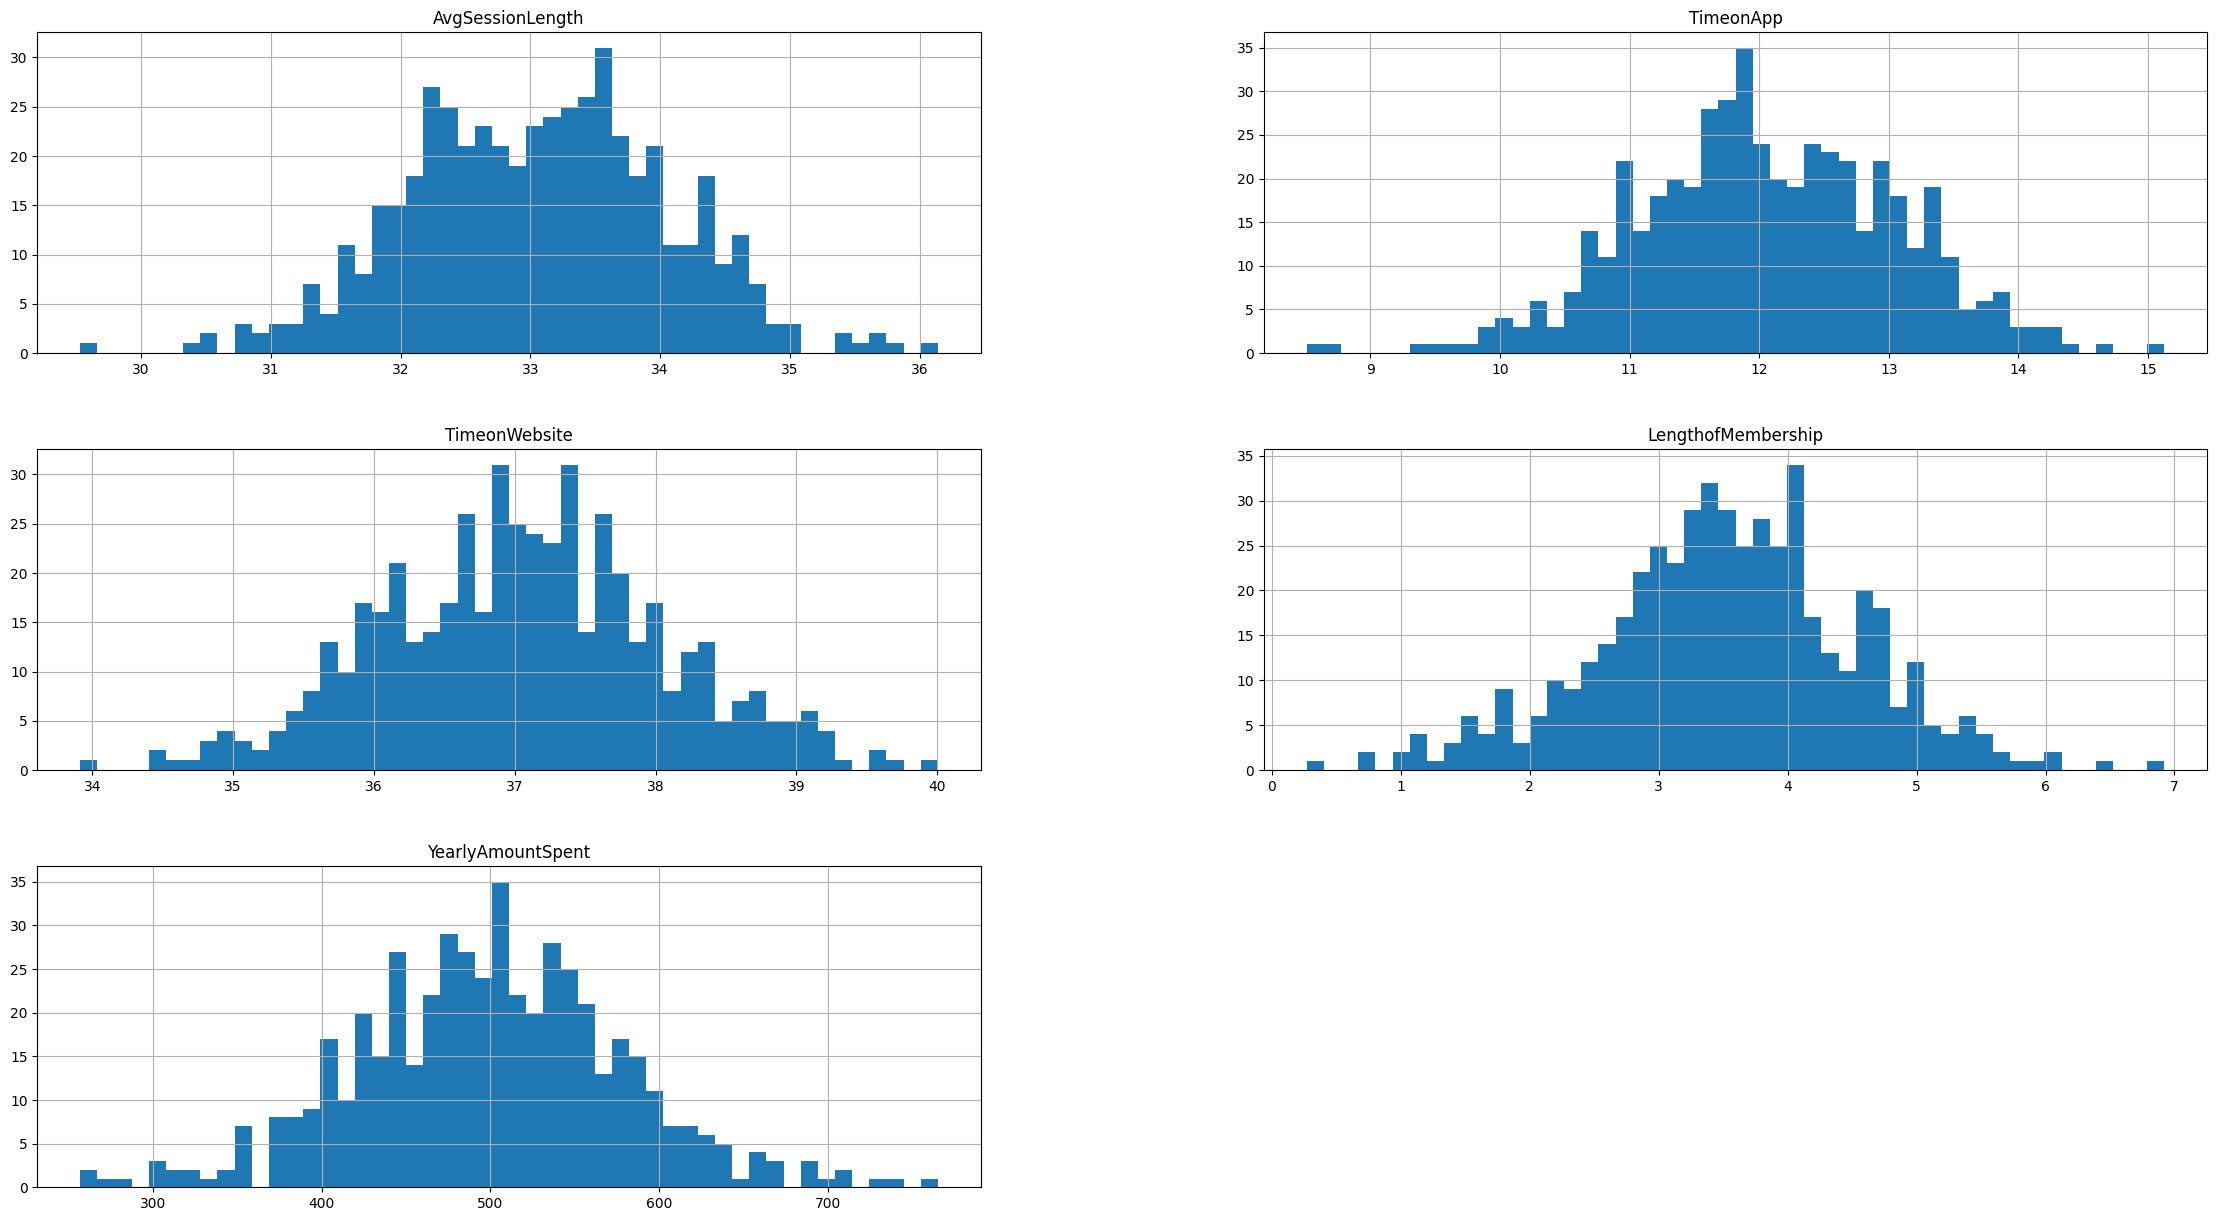

In [59]:
df.hist(bins =  50 , figsize=(28 , 15))
plt.show()

In [61]:
SAttributes = ['AvgSessionLength', 'TimeonApp', 'TimeonWebsite', 'LengthofMembership', 'YearlyAmountSpent']

In [62]:
df2 = df[SAttributes]
corr_matrix = df2.corr()
print(corr_matrix.columns)


Index(['AvgSessionLength', 'TimeonApp', 'TimeonWebsite', 'LengthofMembership',
       'YearlyAmountSpent'],
      dtype='object')


In [63]:
corr_matrix['YearlyAmountSpent'].sort_values(ascending= False )

YearlyAmountSpent     1.000000
LengthofMembership    0.809084
TimeonApp             0.499328
AvgSessionLength      0.355088
TimeonWebsite        -0.002641
Name: YearlyAmountSpent, dtype: float64

In [64]:
y = df['YearlyAmountSpent']
x = df2.drop('YearlyAmountSpent' , axis=1)

In [65]:
from sklearn.model_selection   import train_test_split
X_train , X_test , Y_train ,  Y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

array([[<Axes: xlabel='AvgSessionLength', ylabel='AvgSessionLength'>,
        <Axes: xlabel='TimeonApp', ylabel='AvgSessionLength'>,
        <Axes: xlabel='TimeonWebsite', ylabel='AvgSessionLength'>,
        <Axes: xlabel='LengthofMembership', ylabel='AvgSessionLength'>,
        <Axes: xlabel='YearlyAmountSpent', ylabel='AvgSessionLength'>],
       [<Axes: xlabel='AvgSessionLength', ylabel='TimeonApp'>,
        <Axes: xlabel='TimeonApp', ylabel='TimeonApp'>,
        <Axes: xlabel='TimeonWebsite', ylabel='TimeonApp'>,
        <Axes: xlabel='LengthofMembership', ylabel='TimeonApp'>,
        <Axes: xlabel='YearlyAmountSpent', ylabel='TimeonApp'>],
       [<Axes: xlabel='AvgSessionLength', ylabel='TimeonWebsite'>,
        <Axes: xlabel='TimeonApp', ylabel='TimeonWebsite'>,
        <Axes: xlabel='TimeonWebsite', ylabel='TimeonWebsite'>,
        <Axes: xlabel='LengthofMembership', ylabel='TimeonWebsite'>,
        <Axes: xlabel='YearlyAmountSpent', ylabel='TimeonWebsite'>],
       [<Axes: xla

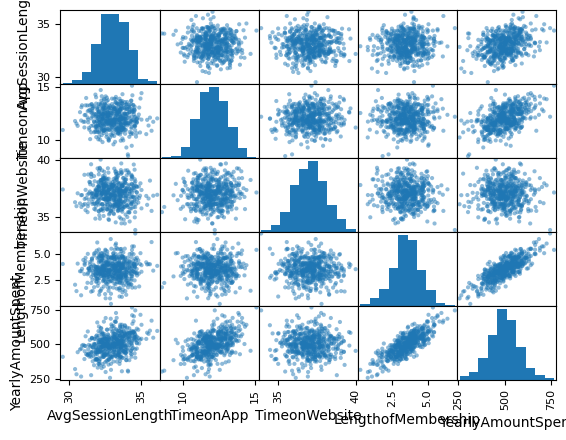

In [66]:
from pandas.plotting import scatter_matrix
scatter_matrix(df2)

In [67]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train , Y_train)

LinearRegression()

In [68]:
predictions = lin_reg.predict(X_test)

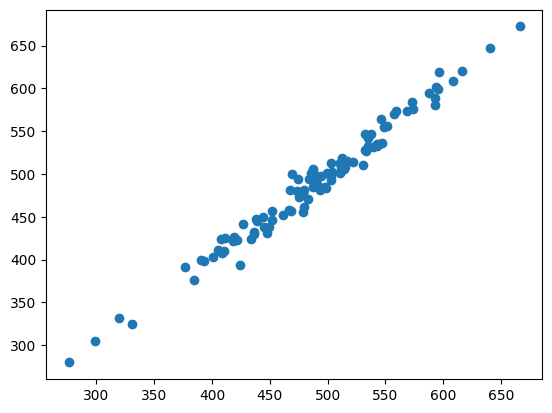

In [69]:
plt.scatter(Y_test , predictions)

In [70]:
from sklearn import metrics
print("MAE : " , metrics.mean_absolute_error(Y_test , predictions))
print("MSE : " , metrics.mean_squared_error(Y_test , predictions))
print("RMSE : " , np.sqrt(metrics.mean_absolute_error(Y_test , predictions)))

MAE :  8.558441885315217
MSE :  109.86374118393982
RMSE :  2.925481479229567


In [71]:
metrics.explained_variance_score(Y_test , predictions)

0.9779115555030538

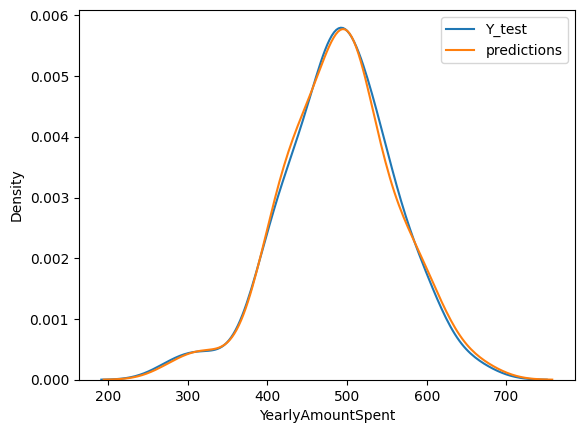

In [73]:
import seaborn as sns
sns.kdeplot(Y_test, label='Y_test')
sns.kdeplot(predictions, label='predictions')

plt.legend()
plt.show()